<a href="https://colab.research.google.com/github/benjium/customer-churn-data-analysis-and-machine-learning/blob/main/customerchun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#customer chun analysis by oniyide benjamin

IMPORT LIBRARIES (WHAT TOOLS I NEED & WHY)

In [ ]:
# Install the python-pptx library so Python can create and edit PowerPoint (.pptx) files
# This is required because Google Colab does NOT have this package installed by default
!pip install python-pptx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 8.4 MB/s eta 0:00:00


In [ ]:
# OS helps us interact with files and folders (create folders, check paths, etc.)
import os

# Pandas is used for loading, cleaning, and analyzing tabular data
import pandas as pd

# NumPy provides numerical operations (arrays, math, NaN handling)
import numpy as np

# Matplotlib is used for creating charts and visualizations
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


# Convert categorical text data into numbers
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Perform statistical analysis and detect outliers
from scipy import stats

# Logistic Regression model (simple and interpretable)
from sklearn.linear_model import LogisticRegression

#Accuracy / evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# for saving the model
import joblib


# Evaluation metrics to check model performance
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve
)

# Used to generate PowerPoint slides programmatically
from pptx import Presentation
from pptx.util import Inches

# Create a folder to store plots if it doesn't already exist
os.makedirs("/content/churn_plots", exist_ok=True)




# ***EDA***

In [ ]:

# This link points directly to the Excel file so pandas can read it
file_url = "https://raw.githubusercontent.com/benjium/benjium/main/customer%20chun%20dataset.xlsx"

# Pandas automatically downloads the file from the URL
df = pd.read_excel(file_url)

# This helps us understand the size of the data
print("Dataset shape:", df.shape)


Dataset shape: (7043, 21)


In [ ]:
# Display first 5 rows to understand structure
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


DATA CLEANING

In [ ]:
# Display column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Check how many missing values exist in each column
print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))


Missing values per column:
TotalCharges        11
gender               0
SeniorCitizen        0
Partner              0
customerID           0
Dependents           0
tenure               0
MultipleLines        0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
InternetService      0
TechSupport          0
StreamingTV          0
Contract             0
StreamingMovies      0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
Churn                0
dtype: int64


In [ ]:
# Drop rows where TotalCharges is missing (since it's only 11 rows out of ~7000)
df = df[~df['TotalCharges'].isna()].copy()          # filter rows where TotalCharges is NOT null and copy to new df

In [ ]:
# Check how many missing values exist in each column
print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))


Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


FEATURES ENGINEERING

In [ ]:
# Use pd.to_numeric with errors='coerce' to convert safely; we already removed missing TotalCharges above
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')   # coerce invalid -> NaN (shouldn't happen)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')       # convert to numeric floats

In [ ]:
# Tenure and SeniorCitizen: tenure is numeric; SeniorCitizen is 0/1 but should be category for counts
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')                   # ensure numeric
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int).astype('category')      # convert to categorical (0/1) for plots

In [ ]:
#Convert obvious categorical text columns to 'category' dtype to save memory and for grouping
categorical_cols = [
    'gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
    'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
    'StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

In [ ]:
#Drop  customerID
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)  # drop ID column to avoid accidental use in modeling

In [ ]:
#Ensure Churn is categorical and create numeric binary column for modeling & plotting
if 'Churn' in df.columns:
    df['Churn'] = df['Churn'].astype('category')         # keep original as categorical for count plots
    df['churn_flag'] = df['Churn'].cat.codes      # 0/1 integer representation (No->0, Yes->1 typically)

In [ ]:
# Print dtypes summary to confirm changes
print("\nData types after conversions:")
display(df.dtypes)



Data types after conversions:


,0
gender,object
SeniorCitizen,category
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


DATA ANALYSIS

In [ ]:
# Numeric descriptive statistics (mean, std, min, max, quartiles)
print("\nNumeric summary (describe):")
display(df.describe().T)


Numeric summary (describe):


,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
churn_flag,7032.0,0.265785,0.441782,0.00,0.0000,0.000,1.0000,1.00


In [ ]:
# Categorical summary: top categories and counts
print("\nCategorical summary (value counts for categorical columns):")
for c in categorical_cols + ['SeniorCitizen']:
    if c in df.columns:
        print(f"\nColumn: {c}")
        display(df[c].value_counts())


Categorical summary (value counts for categorical columns):

Column: gender


,count
gender,
Male,3549
Female,3483



Column: Partner


,count
Partner,
No,3639
Yes,3393



Column: Dependents


,count
Dependents,
No,4933
Yes,2099



Column: PhoneService


,count
PhoneService,
Yes,6352
No,680



Column: MultipleLines


,count
MultipleLines,
No,3385
Yes,2967
No phone service,680



Column: InternetService


,count
InternetService,
Fiber optic,3096
DSL,2416
No,1520



Column: OnlineSecurity


,count
OnlineSecurity,
No,3497
Yes,2015
No internet service,1520



Column: OnlineBackup


,count
OnlineBackup,
No,3087
Yes,2425
No internet service,1520



Column: DeviceProtection


,count
DeviceProtection,
No,3094
Yes,2418
No internet service,1520



Column: TechSupport


,count
TechSupport,
No,3472
Yes,2040
No internet service,1520



Column: StreamingTV


,count
StreamingTV,
No,2809
Yes,2703
No internet service,1520



Column: StreamingMovies


,count
StreamingMovies,
No,2781
Yes,2731
No internet service,1520



Column: Contract


,count
Contract,
Month-to-month,3875
Two year,1685
One year,1472



Column: PaperlessBilling


,count
PaperlessBilling,
Yes,4168
No,2864



Column: PaymentMethod


,count
PaymentMethod,
Electronic check,2365
Mailed check,1604
Bank transfer (automatic),1542
Credit card (automatic),1521



Column: SeniorCitizen


,count
SeniorCitizen,
0,5890
1,1142


# DATA VISUALIZATION

DISTRIBUTION PLOTS for numeric features

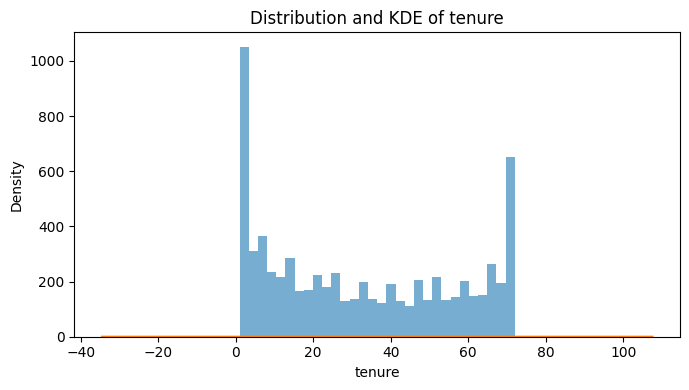

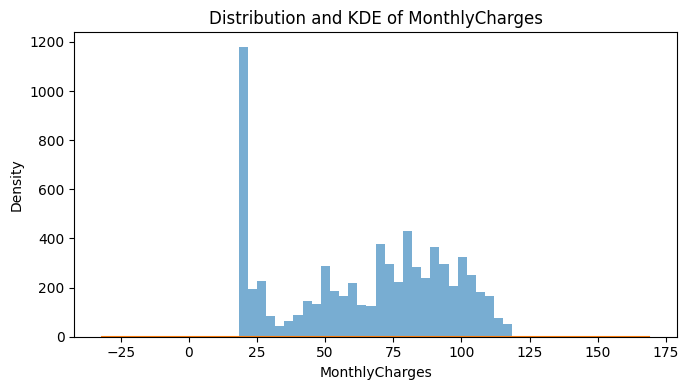

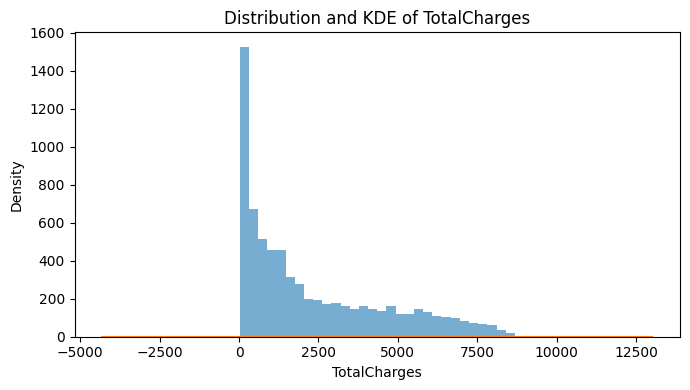

In [ ]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
# Ensure only include those actually in df
numeric_features = [c for c in numeric_features if c in df.columns]

for col in numeric_features:
    # Create figure
    plt.figure(figsize=(7,4))                                   # set figure size
    df[col].plot(kind='hist', bins=30, alpha=0.6)               # draw histogram
    # Add KDE overlay using pandas/Matplotlib
    df[col].plot(kind='kde')                                    # density plot (KDE) on same axis
    plt.title(f'Distribution and KDE of {col}')                 # title for clarity
    plt.xlabel(col)                                             # x-axis label
    plt.tight_layout()                                          # adjust layout to fit labels
                                               # close figure to free memory


In [ ]:
path = f"/content/churn_plots/dist_{col}.png"               # set save path
plt.savefig(path)                                           # save figure to disk
plt.close()

BOXPLOTS for numeric features to visualize outliers

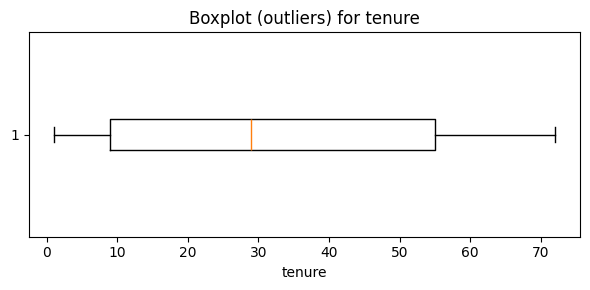

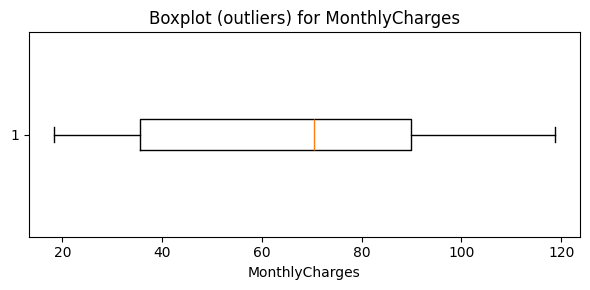

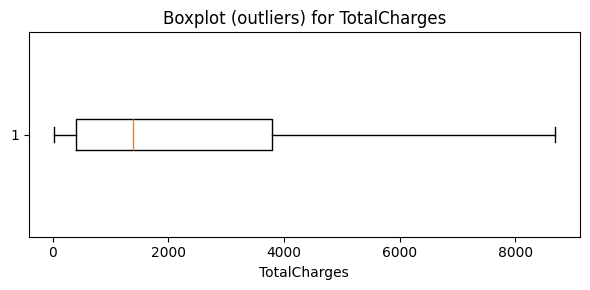

In [ ]:
for col in numeric_features:
    plt.figure(figsize=(6,3))                                   # smaller figure for boxplot
    plt.boxplot(df[col].dropna(), vert=False)                   # horizontal boxplot; drop NaNs
    plt.title(f'Boxplot (outliers) for {col}')                  # title
    plt.xlabel(col)
    plt.tight_layout()


In [ ]:
path = f"/content/churn_plots/box_{col}.png"                # save path
plt.savefig(path)
plt.close()
print("Saved boxplot:", path)

Saved boxplot: /content/churn_plots/box_TotalCharges.png


OUTLIER DETECTION: IQR method and Z-score method (list top outliers)

In [ ]:
# Function: IQR outliers for a series -> returns boolean mask of outlier rows
def iqr_outlier_mask(series, k=1.5):
    # compute Q1 and Q3
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return (series < lower) | (series > upper)  # boolean mask where outliers True

In [ ]:
# Compute and print counts of IQR outliers per numeric column
print("\nIQR outlier counts per numeric feature:")
for col in numeric_features:
    mask = iqr_outlier_mask(df[col].dropna())
    cnt = mask.sum()
    print(f"{col}: {cnt} outliers (IQR, k=1.5)")


IQR outlier counts per numeric feature:
tenure: 0 outliers (IQR, k=1.5)
MonthlyCharges: 0 outliers (IQR, k=1.5)
TotalCharges: 0 outliers (IQR, k=1.5)


In [ ]:
# Z-score method: show top records by absolute z-score for each numeric feature
print("\nTop z-score outliers (by absolute z-score) for numeric features:")
for col in numeric_features:
    # compute z-scores, drop NaNs
    z = np.abs(stats.zscore(df[col].dropna()))
    # if all z computed successfully:
    if len(z) > 0:
        # show top 5 z-scores and their corresponding original values (match indices)
        idx_sorted = np.argsort(-z)[:5]                       # indices of top 5 z-scores (descending)
        print(f"\n{col} top 5 z-score outliers (z, value):")
        for idx in idx_sorted:
            print(f"z = {z[idx]:.2f}, value = {df[col].dropna().iloc[idx]}")


Top z-score outliers (by absolute z-score) for numeric features:

tenure top 5 z-score outliers (z, value):
z = 1.61, value = 72
z = 1.61, value = 72
z = 1.61, value = 72
z = 1.61, value = 72
z = 1.61, value = 72

MonthlyCharges top 5 z-score outliers (z, value):
z = 1.79, value = 118.75
z = 1.79, value = 118.65
z = 1.79, value = 118.6
z = 1.79, value = 118.6
z = 1.78, value = 118.35

TotalCharges top 5 z-score outliers (z, value):
z = 2.82, value = 8684.8
z = 2.82, value = 8672.45
z = 2.82, value = 8670.1
z = 2.78, value = 8594.4
z = 2.77, value = 8564.75


### CORRELATION ANALYSIS

In [ ]:
# Build numeric dataframe to correlate
num_df = df[numeric_features].dropna()                        # drop rows with NaNs in numeric features for correlation


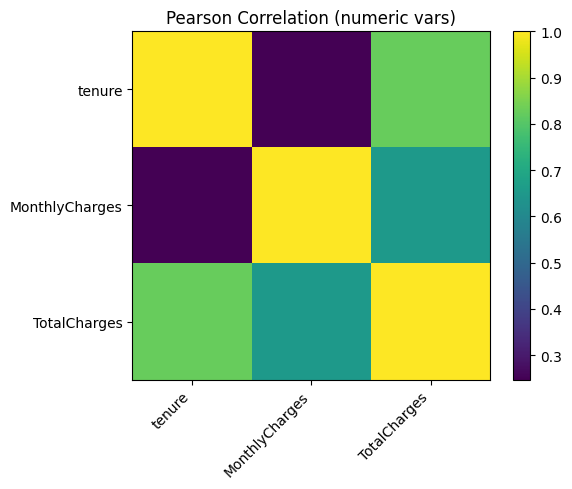

In [ ]:
# Pearson correlation matrix (linear)
pearson_corr = num_df.corr(method='pearson')                  # compute Pearson correlation
plt.figure(figsize=(6,5))
plt.imshow(pearson_corr, interpolation='none', aspect='auto') # show matrix visually
plt.colorbar()                                                # add colorbar
plt.xticks(range(len(pearson_corr.columns)), pearson_corr.columns, rotation=45, ha='right')  # xticks labels
plt.yticks(range(len(pearson_corr.index)), pearson_corr.index)                            # yticks labels
plt.title('Pearson Correlation (numeric vars)')
plt.tight_layout()

In [ ]:
pearson_path = "/content/churn_plots/pearson_correlation.png"
plt.savefig(pearson_path)
plt.close()
print("Saved Pearson correlation heatmap:", pearson_path)

Saved Pearson correlation heatmap: /content/churn_plots/pearson_correlation.png


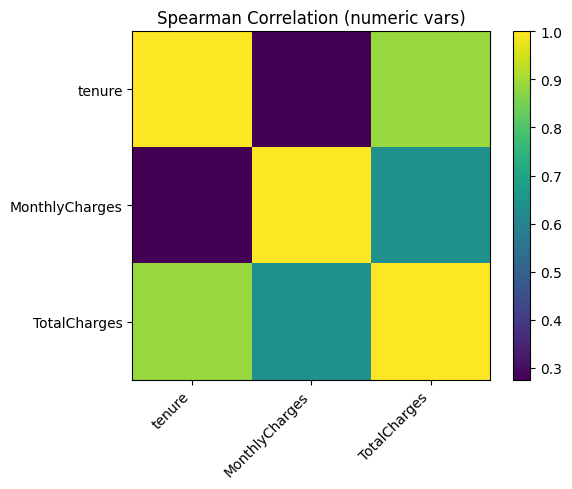

In [ ]:
# Spearman correlation matrix (monotonic relationships)
spearman_corr = num_df.corr(method='spearman')
plt.figure(figsize=(6,5))
plt.imshow(spearman_corr, interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(spearman_corr.columns)), spearman_corr.columns, rotation=45, ha='right')
plt.yticks(range(len(spearman_corr.index)), spearman_corr.index)
plt.title('Spearman Correlation (numeric vars)')
plt.tight_layout()

In [ ]:
spearman_path = "/content/churn_plots/spearman_correlation.png"
plt.savefig(spearman_path)
plt.close()
print("Saved Spearman correlation heatmap:", spearman_path)

Saved Spearman correlation heatmap: /content/churn_plots/spearman_correlation.png


CATEGORICAL VISUALS: counts & churn rate by category

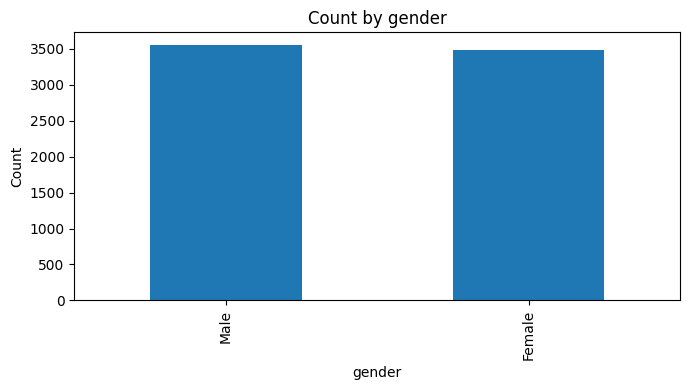

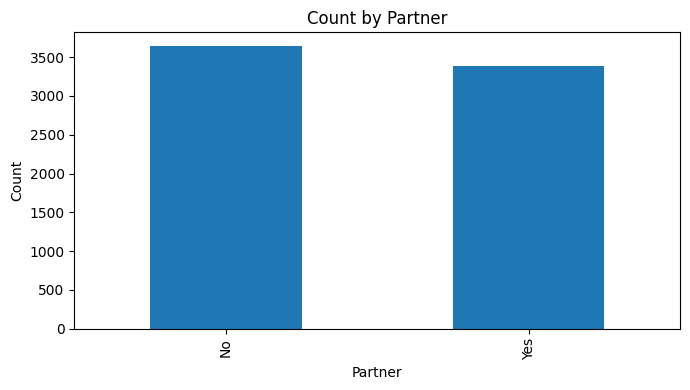

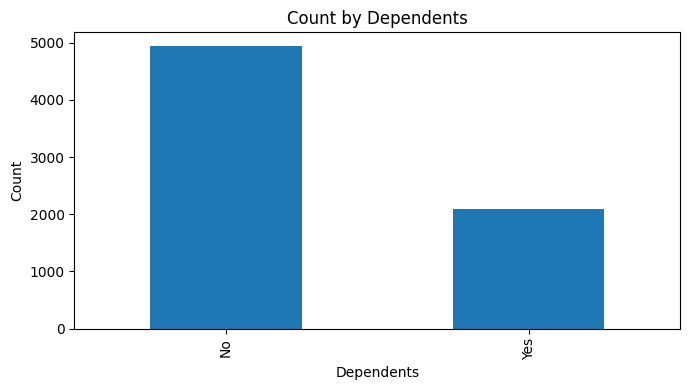

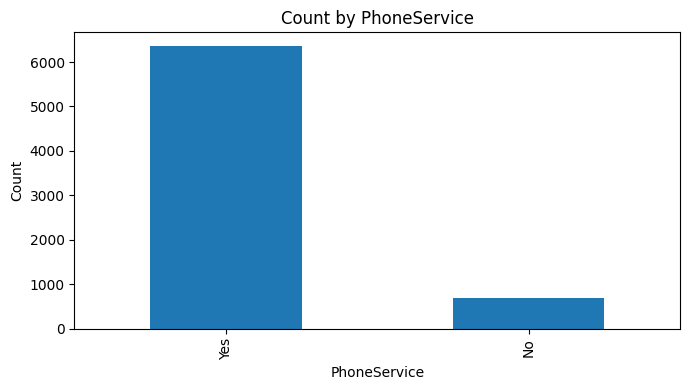

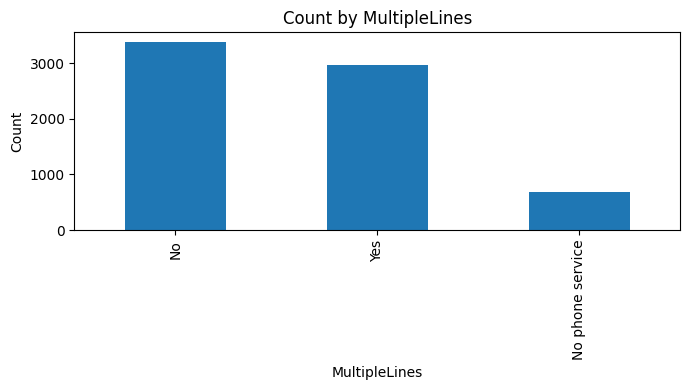

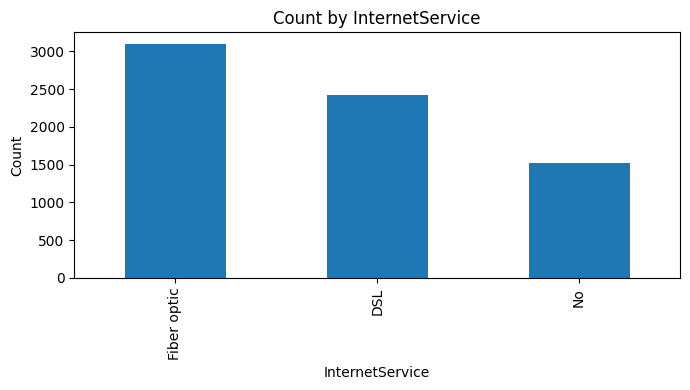

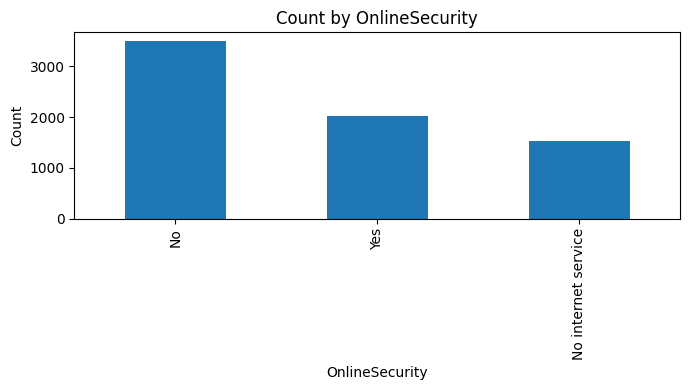

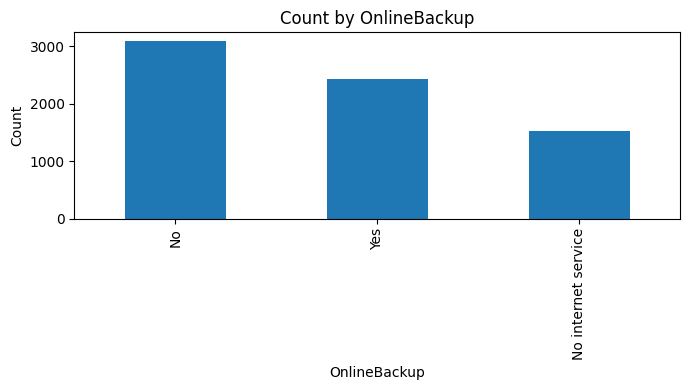

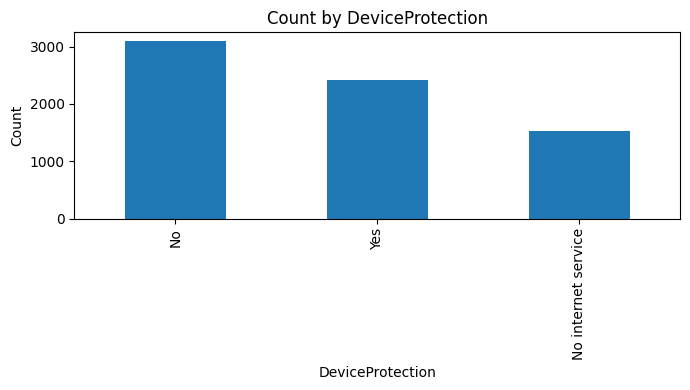

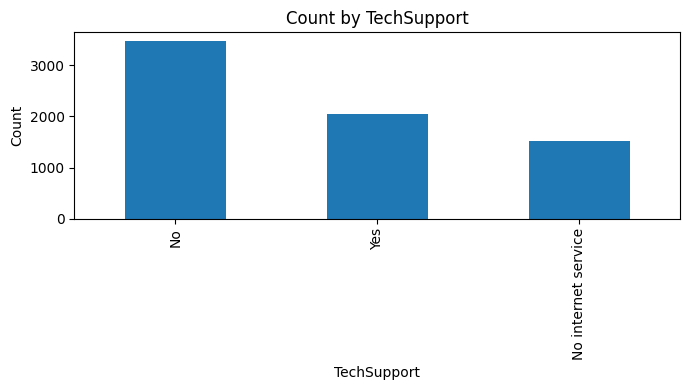

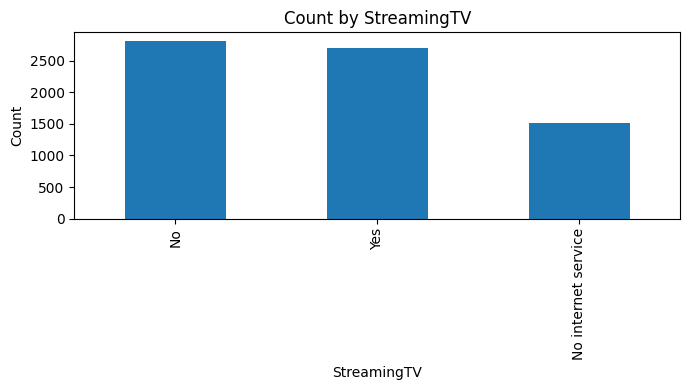

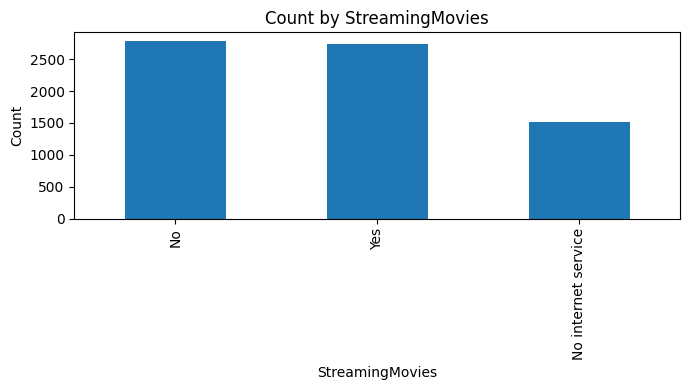

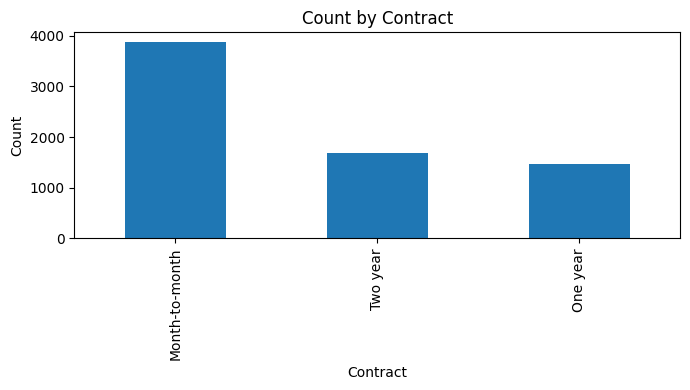

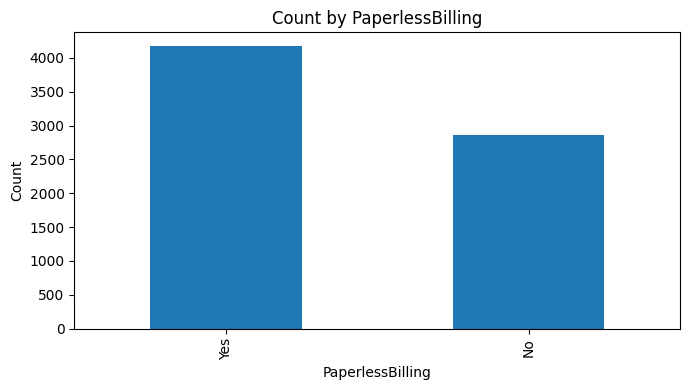

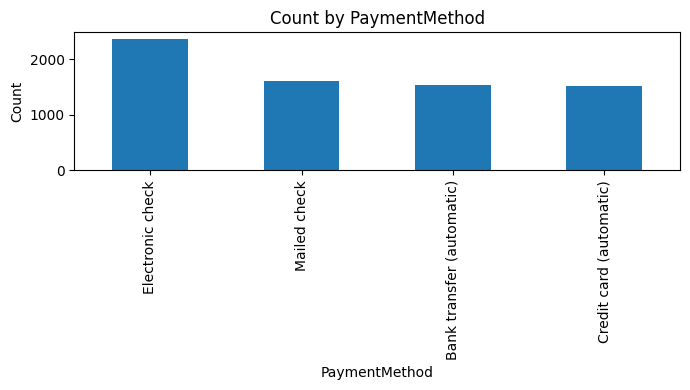

In [ ]:
# Plot counts for each categorical column (first few to avoid too many charts)
for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(7,4))                             # set figure size
        df[col].value_counts().plot(kind='bar')               # bar chart of counts
        plt.title(f'Count by {col}')                          # title
        plt.xlabel(col)                                       # label
        plt.ylabel('Count')                                   # y label
        plt.tight_layout()                                    # tidy layout

In [ ]:
path = f"/content/churn_plots/counts_{col}.png"       # save path
plt.savefig(path)                                     # save file
plt.close()                                          # close fig
print("Saved categorical counts plot:", path)

Saved categorical counts plot: /content/churn_plots/counts_PaymentMethod.png


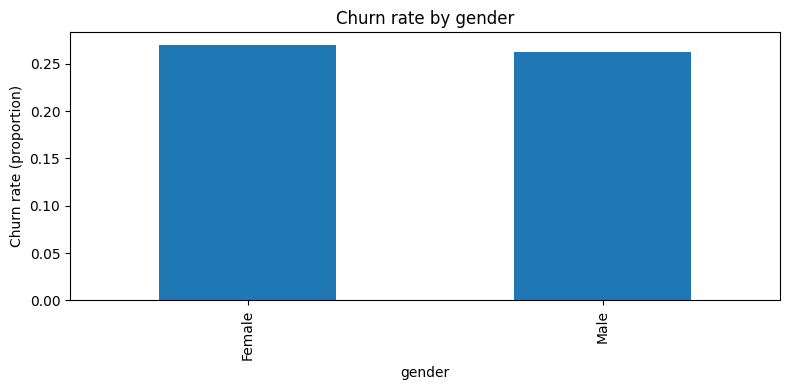

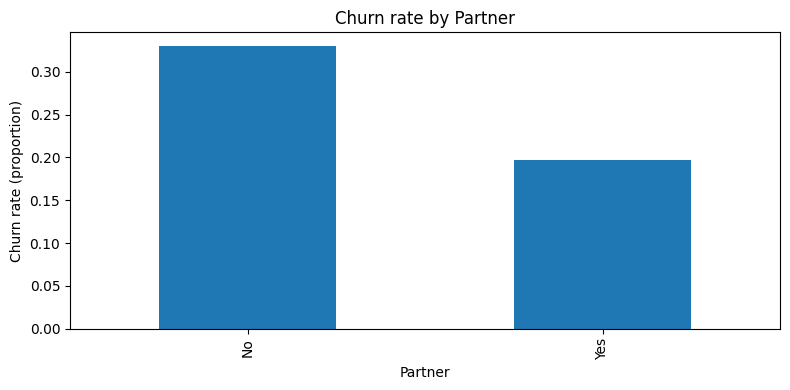

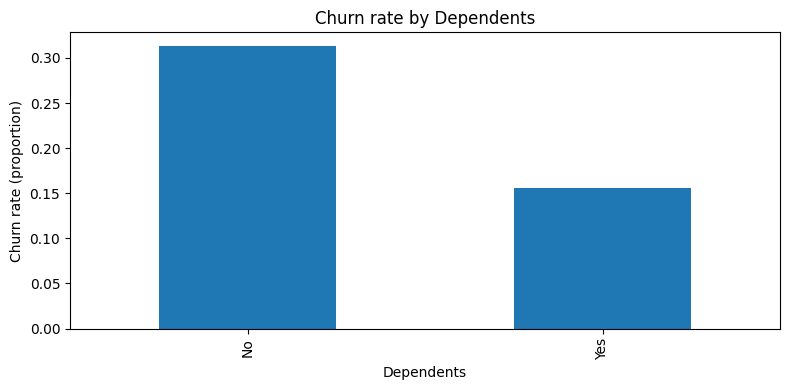

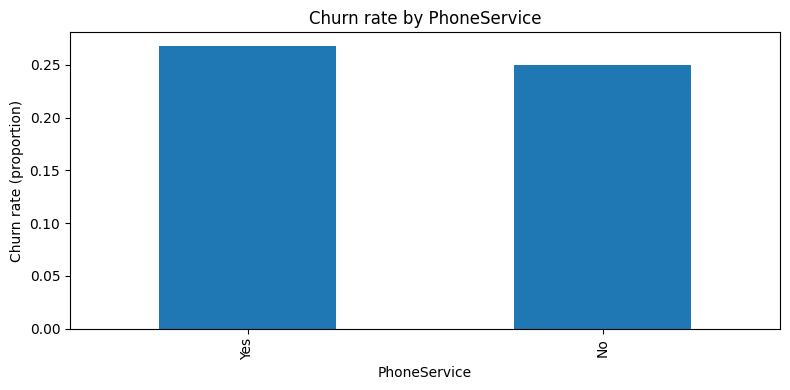

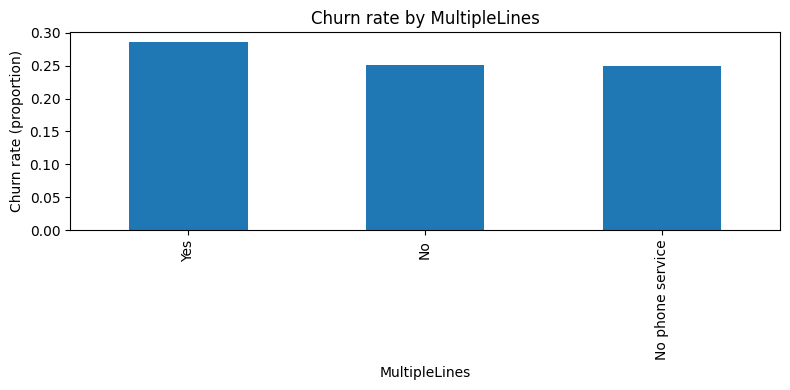

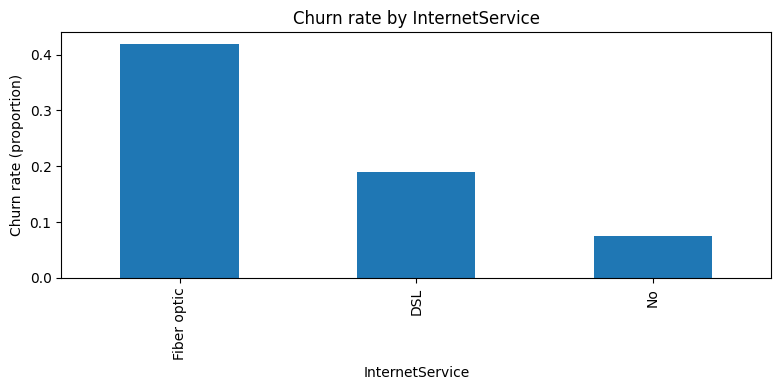

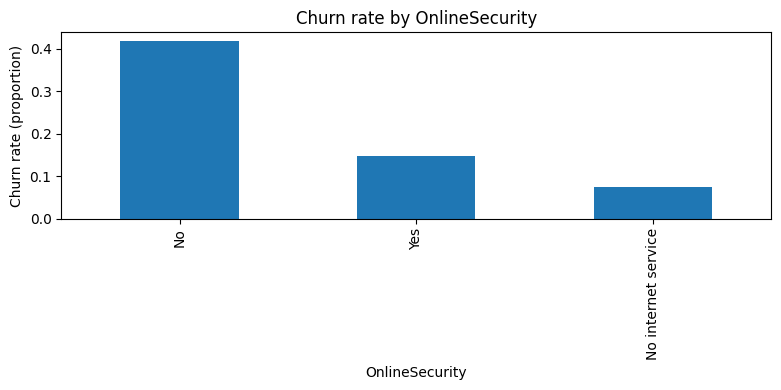

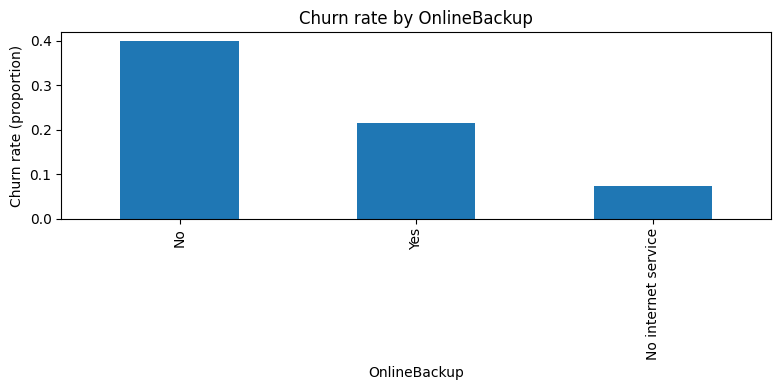

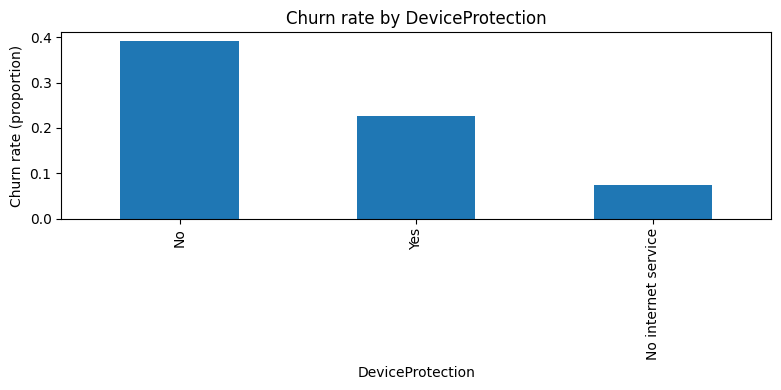

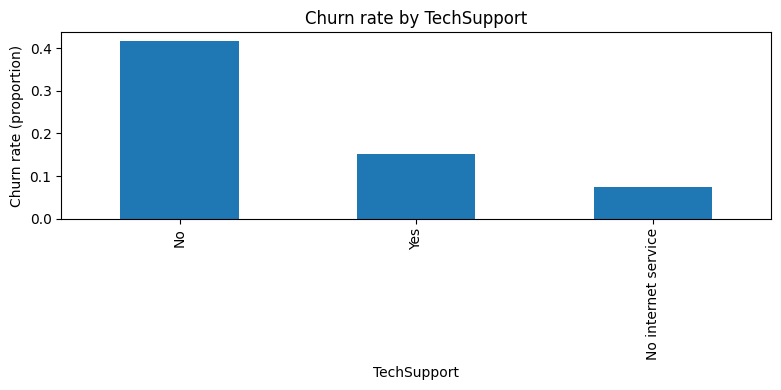

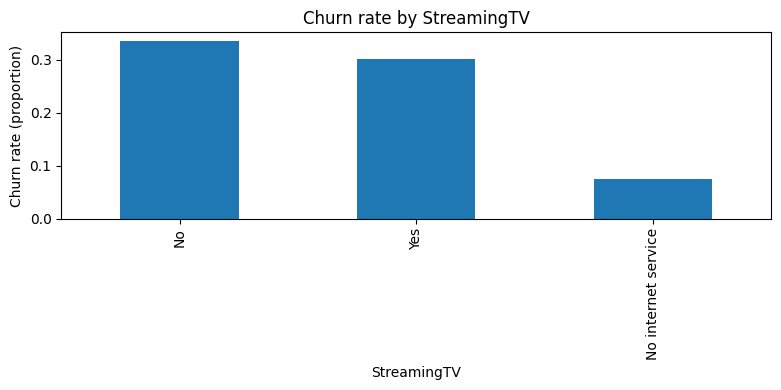

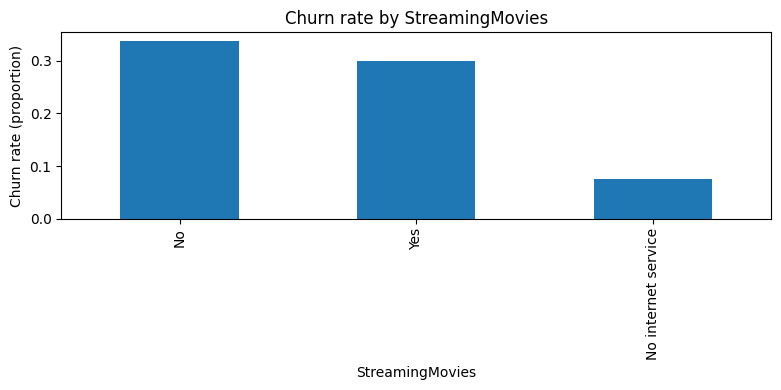

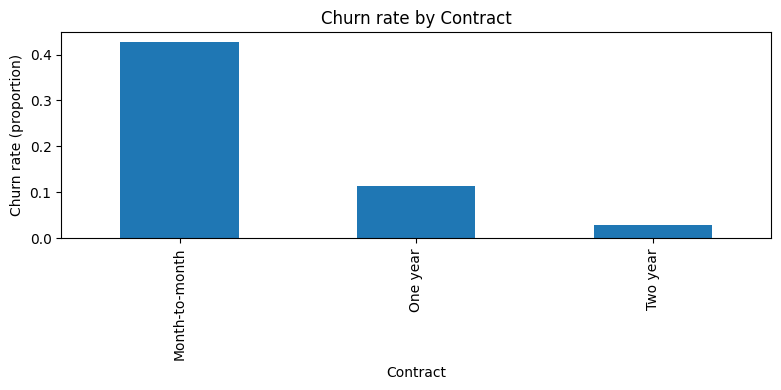

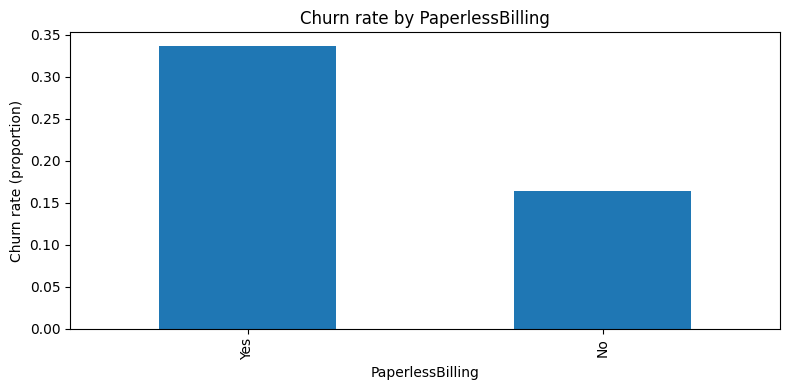

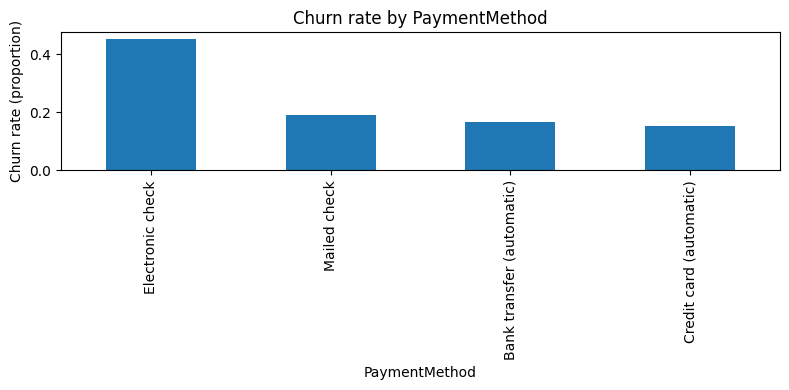

In [ ]:
# Plot churn rate per category for each categorical column (use groupby mean on churn_flag)
for col in categorical_cols:
    if col in df.columns:
        # compute proportion of churn per category
        prop = df.groupby(col)['churn_flag'].mean().sort_values(ascending=False)
        plt.figure(figsize=(8,4))
        prop.plot(kind='bar')
        plt.title(f'Churn rate by {col}')
        plt.ylabel('Churn rate (proportion)')
        plt.tight_layout()

In [ ]:
path = f"/content/churn_plots/churnrate_{col}.png"
plt.savefig(path)
plt.close()
print("Saved churn-rate-by-category plot:", path)

Saved churn-rate-by-category plot: /content/churn_plots/churnrate_PaymentMethod.png


PAIRWISE SCATTER (small set) for numeric variables colored by churn

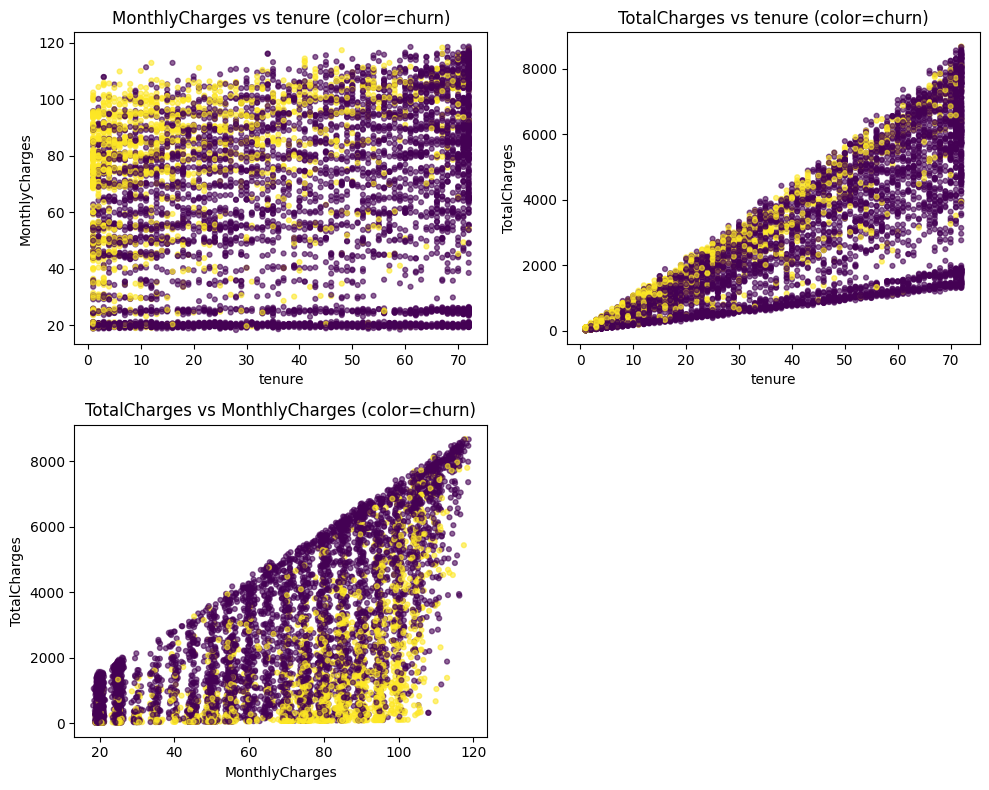

In [ ]:
# Only do pairwise scatter for up to three numeric features to keep readability
pair_cols = numeric_features[:3]                               # choose up to first 3 numeric features
if len(pair_cols) >= 2:
    # Use GridSpec to layout subplots for each pair
    pairs = [(pair_cols[i], pair_cols[j]) for i in range(len(pair_cols)) for j in range(i+1, len(pair_cols))]
    n = len(pairs)
    cols = 2
    rows = (n + cols - 1) // cols
    fig = plt.figure(figsize=(cols*5, rows*4))
    gs = GridSpec(rows, cols, figure=fig)
    for k, (xcol, ycol) in enumerate(pairs):
        ax = fig.add_subplot(gs[k])
        # scatter plot with alpha for overlap clarity
        ax.scatter(df[xcol], df[ycol], c=df['churn_flag'], alpha=0.6, s=12)
        ax.set_xlabel(xcol)
        ax.set_ylabel(ycol)
        ax.set_title(f"{ycol} vs {xcol} (color=churn)")
    plt.tight_layout()

PCA 2D projection of numeric features colored by churn (simple visualization)

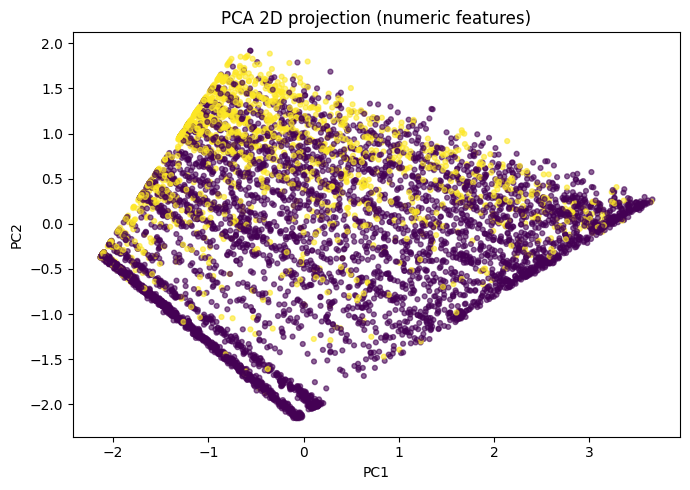

In [ ]:
# Prepare numeric features for PCA: fillna with median for safe PCA
pca_features = numeric_features.copy()
if len(pca_features) >= 2:
    X_pca = df[pca_features].fillna(df[pca_features].median())   # impute median for any NaNs
    scaler = StandardScaler()                                   # create scaler
    X_scaled = scaler.fit_transform(X_pca)                      # scale features
    pca = PCA(n_components=2, random_state=42)                  # 2D PCA
    X2 = pca.fit_transform(X_scaled)                            # transform to 2 principal components
    plt.figure(figsize=(7,5))
    plt.scatter(X2[:,0], X2[:,1], c=df['churn_flag'], alpha=0.6, s=12)  # color by churn flag
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA 2D projection (numeric features)')
    plt.tight_layout()

In [ ]:
path = "/content/churn_plots/pca_2d.png"
plt.savefig(path)
plt.close()
print("Saved PCA 2D projection:", path)

Saved PCA 2D projection: /content/churn_plots/pca_2d.png


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_flag
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


# MODEL TRAINING

Prepare features and target

In [ ]:
# Assume numeric_features and encoded categorical columns exist
encoded_cols = [c for c in df.columns if c.endswith('_enc')]
model_features = list(set(numeric_features + encoded_cols))
model_features = [c for c in model_features if c in df.columns]  # remove missing column


In [ ]:
# Prepare modeling DataFrame
model_df = df[model_features + ['churn_flag']].dropna().copy()

if len(model_features) < 1 or model_df.shape[0] < 50:
    print("Not enough data/features for baseline logistic regression.")
else:
    X = model_df[model_features].values
    y = model_df['churn_flag'].values


Train/test split

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )


 Scale features

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Fit logistic regression

In [ ]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Evaluate model

In [ ]:
y_pred = lr.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {acc:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.7747

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1033
           1       0.61      0.44      0.51       374

    accuracy                           0.77      1407
   macro avg       0.71      0.67      0.68      1407
weighted avg       0.76      0.77      0.76      1407



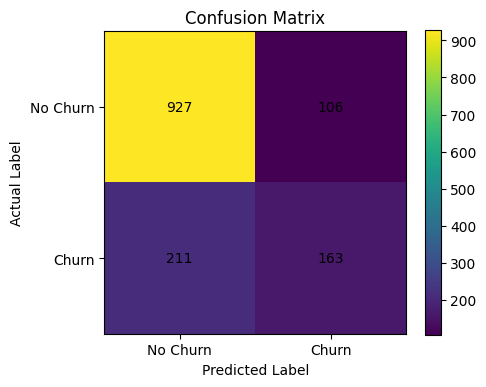

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()

# Tick labels
classes = ['No Churn', 'Churn']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add numbers inside cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 verticalalignment="center")

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

Feature importance (coefficients)

In [ ]:
coefs = lr.coef_[0]
coef_df = pd.DataFrame({
    'feature': model_features,
    'coef': coefs
})
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df.sort_values('abs_coef', ascending=False, inplace=True)

print("\nTop features by absolute logistic coefficient:")
display(coef_df.head(15))


Top features by absolute logistic coefficient:


,feature,coef,abs_coef
0,tenure,-1.576400,1.576400
2,MonthlyCharges,0.925934,0.925934
1,TotalCharges,0.261371,0.261371


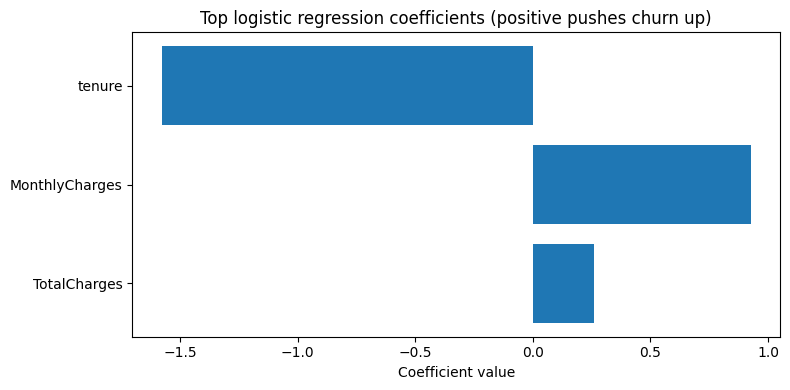

In [ ]:
 # Plot top coefficients
topn = min(10, coef_df.shape[0])
plt.figure(figsize=(8,4))
plt.barh(coef_df['feature'].head(topn)[::-1], coef_df['coef'].head(topn)[::-1])
plt.title('Top logistic regression coefficients (positive pushes churn up)')
plt.xlabel('Coefficient value')
plt.tight_layout()


In [ ]:
plot_path = "/content/churn_plots/logistic_coefs.png"
plt.savefig(plot_path)
plt.close()
print("Saved logistic coefficient plot:", plot_path)

Saved logistic coefficient plot: /content/churn_plots/logistic_coefs.png


 Save model and scaler

In [ ]:
import os

os.makedirs("/content/churn_models", exist_ok=True)
model_path = "/content/churn_models/logistic_model.joblib"
scaler_path = "/content/churn_models/scaler.joblib"
joblib.dump(lr, model_path)
joblib.dump(scaler, scaler_path)
print("Saved logistic regression model:", model_path)
print("Saved feature scaler:", scaler_path)

Saved logistic regression model: /content/churn_models/logistic_model.joblib
Saved feature scaler: /content/churn_models/scaler.joblib


# **NOTE**

The model achieved an accuracy of 77%, which is partly influenced by class imbalance in the target (churn) variable. The majority class dominates the dataset, making accuracy a less reliable metric on its own.

Model performance could be improved by applying techniques such as undersampling the majority class, oversampling the minority class (e.g., SMOTE), or hyperparameter tuning. However, these approaches were not applied in this project, as the primary focus is on exploratory data analysis and insight generation, rather than optimizing predictive performance.

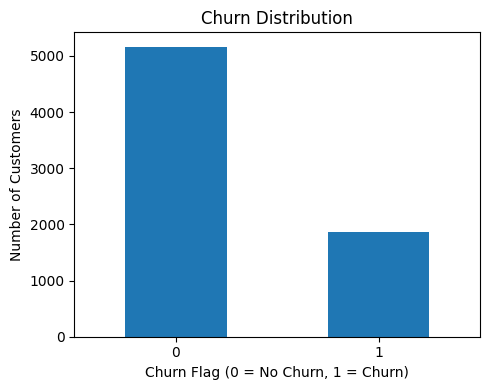

In [ ]:
# Churn distribution (counts)
churn_counts = df['churn_flag'].value_counts()

# Churn distribution (percentages)
churn_percent = df['churn_flag'].value_counts(normalize=True) * 100

plt.figure(figsize=(5,4))
df['churn_flag'].value_counts().plot(kind='bar')
plt.title("Churn Distribution")
plt.xlabel("Churn Flag (0 = No Churn, 1 = Churn)")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()